In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
CHEATER_DIR = "/content/drive/MyDrive/Skripsi/data/processed/features/cheater"
NON_CHEATER_DIR = "/content/drive/MyDrive/Skripsi/data/processed/features/legit"
os.makedirs(CHEATER_DIR, exist_ok=True)
os.makedirs(NON_CHEATER_DIR, exist_ok=True)

In [6]:
def load_data(directory):
    dfs = []
    try:
        for file in os.listdir(directory):
            if file.endswith('.csv'):
                df = pd.read_csv(os.path.join(directory, file))
                dfs.append(df)
        return pd.concat(dfs, ignore_index=True)
    except FileNotFoundError:
        print(f"Directory {directory} not found. Creating empty DataFrame.")
        return pd.DataFrame()

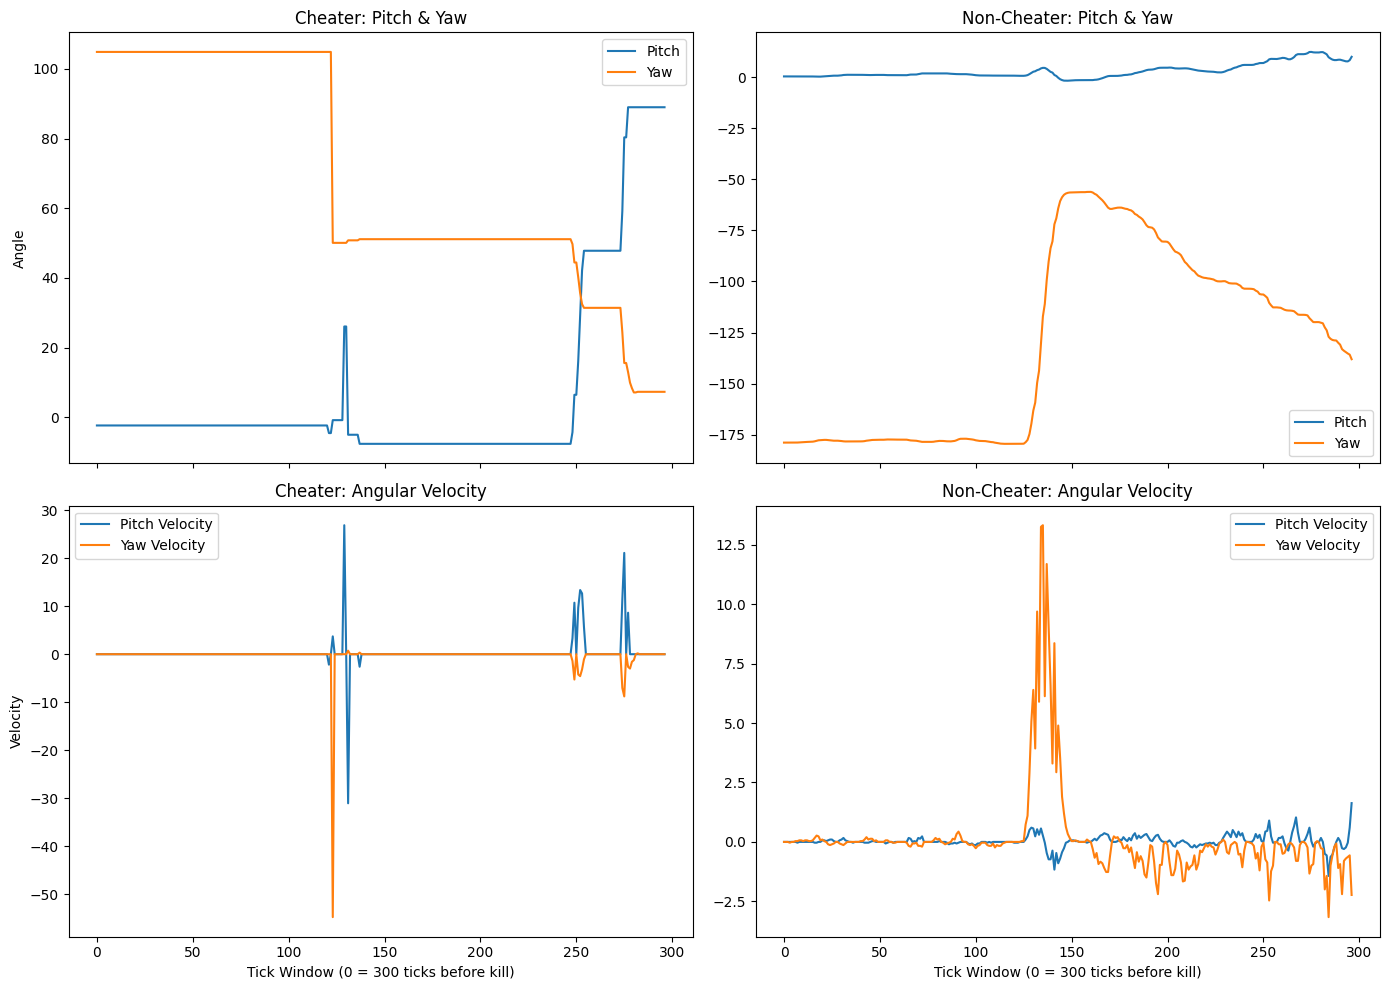

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load one engineered CSV for each
cheater_file = '/content/drive/MyDrive/Skripsi/data/processed/features/cheater/engineered_thesis_test_cheat_kill_1604_to_1904.csv'
non_cheater_file = '/content/drive/MyDrive/Skripsi/data/processed/features/legit/engineered_Copy of cheater(xxx)_kill_13108_to_13408.csv'

cheater_df = pd.read_csv(cheater_file).reset_index(drop=True)
noncheater_df = pd.read_csv(non_cheater_file).reset_index(drop=True)

# Create a 0-300 x-axis (or up to the length of your data)
cheater_x = cheater_df.index
noncheater_x = noncheater_df.index

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

# Cheater Pitch/Yaw
axs[0,0].plot(cheater_x, cheater_df['pitch'], label='Pitch')
axs[0,0].plot(cheater_x, cheater_df['yaw'], label='Yaw')
axs[0,0].set_title('Cheater: Pitch & Yaw')
axs[0,0].set_ylabel('Angle')
axs[0,0].legend()

# Non-cheater Pitch/Yaw
axs[0,1].plot(noncheater_x, noncheater_df['pitch'], label='Pitch')
axs[0,1].plot(noncheater_x, noncheater_df['yaw'], label='Yaw')
axs[0,1].set_title('Non-Cheater: Pitch & Yaw')
axs[0,1].legend()

# Cheater Velocity
axs[1,0].plot(cheater_x, cheater_df['pitch_velocity'], label='Pitch Velocity')
axs[1,0].plot(cheater_x, cheater_df['yaw_velocity'], label='Yaw Velocity')
axs[1,0].set_title('Cheater: Angular Velocity')
axs[1,0].set_xlabel('Tick Window (0 = 300 ticks before kill)')
axs[1,0].set_ylabel('Velocity')
axs[1,0].legend()

# Non-cheater Velocity
axs[1,1].plot(noncheater_x, noncheater_df['pitch_velocity'], label='Pitch Velocity')
axs[1,1].plot(noncheater_x, noncheater_df['yaw_velocity'], label='Yaw Velocity')
axs[1,1].set_title('Non-Cheater: Angular Velocity')
axs[1,1].set_xlabel('Tick Window (0 = 300 ticks before kill)')
axs[1,1].legend()

plt.tight_layout()
plt.show()